# unet结构

In [ ]:
def conv2d_block(input_tensor, n_filters, kernel_size = 3, batchnorm = True):
    """Function to add 2 convolutional layers with the parameters passed to it"""
    # first layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # second layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(x)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    return x
  
def get_unet(input_img, n_filters = 16, dropout = 0.1, batchnorm = True):
# Contracting Path
    c1 = conv2d_block(input_img, n_filters * 1, kernel_size = 3, batchnorm = batchnorm)
    p1 = MaxPooling2D((2, 2))(c1)
    p1 = Dropout(dropout)(p1)

    c2 = conv2d_block(p1, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)
    p2 = MaxPooling2D((2, 2))(c2)
    p2 = Dropout(dropout)(p2)

    c3 = conv2d_block(p2, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)
    p3 = MaxPooling2D((2, 2))(c3)
    p3 = Dropout(dropout)(p3)

    c4 = conv2d_block(p3, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)
    p4 = MaxPooling2D((2, 2))(c4)
    p4 = Dropout(dropout)(p4)

    c5 = conv2d_block(p4, n_filters = n_filters * 16, kernel_size = 3, batchnorm = batchnorm)

    # Expansive Path
    u6 = Conv2DTranspose(n_filters * 8, (3, 3), strides = (2, 2), padding = 'same')(c5)
    u6 = concatenate([u6, c4])
    u6 = Dropout(dropout)(u6)
    c6 = conv2d_block(u6, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)

    u7 = Conv2DTranspose(n_filters * 4, (3, 3), strides = (2, 2), padding = 'same')(c6)
    u7 = concatenate([u7, c3])
    u7 = Dropout(dropout)(u7)
    c7 = conv2d_block(u7, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)

    u8 = Conv2DTranspose(n_filters * 2, (3, 3), strides = (2, 2), padding = 'same')(c7)
    u8 = concatenate([u8, c2])
    u8 = Dropout(dropout)(u8)
    c8 = conv2d_block(u8, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)

    u9 = Conv2DTranspose(n_filters * 1, (3, 3), strides = (2, 2), padding = 'same')(c8)
    u9 = concatenate([u9, c1])
    u9 = Dropout(dropout)(u9)
    c9 = conv2d_block(u9, n_filters * 1, kernel_size = 3, batchnorm = batchnorm)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)
    model = Model(inputs=[input_img], outputs=[outputs])
    return model

# gan

Epochs:200
Batch size:128
Batches per epoch:468
---------------Epoch 1---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:12<00:00, 38.78it/s]


---------------Epoch 2---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 64.05it/s]


---------------Epoch 3---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 61.62it/s]


---------------Epoch 4---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:09<00:00, 51.93it/s]


---------------Epoch 5---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:08<00:00, 57.03it/s]


---------------Epoch 6---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:09<00:00, 50.77it/s]


---------------Epoch 7---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.96it/s]


---------------Epoch 8---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.93it/s]


---------------Epoch 9---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 64.96it/s]


---------------Epoch 10---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.54it/s]


---------------Epoch 11---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 66.66it/s]


---------------Epoch 12---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 66.32it/s]


---------------Epoch 13---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 66.07it/s]


---------------Epoch 14---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:06<00:00, 67.19it/s]


---------------Epoch 15---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 66.12it/s]


---------------Epoch 16---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:06<00:00, 67.19it/s]


---------------Epoch 17---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 66.62it/s]


---------------Epoch 18---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:06<00:00, 67.17it/s]


---------------Epoch 19---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:06<00:00, 67.10it/s]


---------------Epoch 20---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:06<00:00, 67.53it/s]


---------------Epoch 21---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 64.86it/s]


---------------Epoch 22---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.61it/s]


---------------Epoch 23---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.35it/s]


---------------Epoch 24---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.72it/s]


---------------Epoch 25---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.37it/s]


---------------Epoch 26---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 66.12it/s]


---------------Epoch 27---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.85it/s]


---------------Epoch 28---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 66.04it/s]


---------------Epoch 29---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 64.73it/s]


---------------Epoch 30---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 66.06it/s]


---------------Epoch 31---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.11it/s]


---------------Epoch 32---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.33it/s]


---------------Epoch 33---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 64.65it/s]


---------------Epoch 34---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.02it/s]


---------------Epoch 35---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.06it/s]


---------------Epoch 36---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.90it/s]


---------------Epoch 37---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 66.16it/s]


---------------Epoch 38---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 66.13it/s]


---------------Epoch 39---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 66.06it/s]


---------------Epoch 40---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.86it/s]


---------------Epoch 41---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 64.25it/s]


---------------Epoch 42---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.75it/s]


---------------Epoch 43---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 64.38it/s]


---------------Epoch 44---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 62.49it/s]


---------------Epoch 45---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 66.78it/s]


---------------Epoch 46---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 64.64it/s]


---------------Epoch 47---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.94it/s]


---------------Epoch 48---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.25it/s]


---------------Epoch 49---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.53it/s]


---------------Epoch 50---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.43it/s]


---------------Epoch 51---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 66.08it/s]


---------------Epoch 52---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.91it/s]


---------------Epoch 53---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 66.00it/s]


---------------Epoch 54---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.86it/s]


---------------Epoch 55---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 63.65it/s]


---------------Epoch 56---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.73it/s]


---------------Epoch 57---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.88it/s]


---------------Epoch 58---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.43it/s]


---------------Epoch 59---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.67it/s]


---------------Epoch 60---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.73it/s]


---------------Epoch 61---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.78it/s]


---------------Epoch 62---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.50it/s]


---------------Epoch 63---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.17it/s]


---------------Epoch 64---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.81it/s]


---------------Epoch 65---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.73it/s]


---------------Epoch 66---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.54it/s]


---------------Epoch 67---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.59it/s]


---------------Epoch 68---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.89it/s]


---------------Epoch 69---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.61it/s]


---------------Epoch 70---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 66.02it/s]


---------------Epoch 71---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.63it/s]


---------------Epoch 72---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.58it/s]


---------------Epoch 73---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.45it/s]


---------------Epoch 74---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.86it/s]


---------------Epoch 75---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.25it/s]


---------------Epoch 76---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.80it/s]


---------------Epoch 77---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.77it/s]


---------------Epoch 78---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.68it/s]


---------------Epoch 79---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.64it/s]


---------------Epoch 80---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.81it/s]


---------------Epoch 81---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 62.99it/s]


---------------Epoch 82---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.73it/s]


---------------Epoch 83---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.77it/s]


---------------Epoch 84---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.75it/s]


---------------Epoch 85---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.86it/s]


---------------Epoch 86---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.30it/s]


---------------Epoch 87---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.65it/s]


---------------Epoch 88---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.87it/s]


---------------Epoch 89---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.34it/s]


---------------Epoch 90---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.80it/s]


---------------Epoch 91---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.95it/s]


---------------Epoch 92---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.26it/s]


---------------Epoch 93---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.96it/s]


---------------Epoch 94---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.61it/s]


---------------Epoch 95---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.72it/s]


---------------Epoch 96---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.74it/s]


---------------Epoch 97---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.90it/s]


---------------Epoch 98---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.73it/s]


---------------Epoch 99---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.84it/s]


---------------Epoch 100---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.49it/s]


---------------Epoch 101---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.15it/s]


---------------Epoch 102---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.02it/s]


---------------Epoch 103---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.78it/s]


---------------Epoch 104---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.96it/s]


---------------Epoch 105---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.87it/s]


---------------Epoch 106---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 66.19it/s]


---------------Epoch 107---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.99it/s]


---------------Epoch 108---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.95it/s]


---------------Epoch 109---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.98it/s]


---------------Epoch 110---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.86it/s]


---------------Epoch 111---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 66.03it/s]


---------------Epoch 112---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.84it/s]


---------------Epoch 113---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.74it/s]


---------------Epoch 114---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.71it/s]


---------------Epoch 115---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.77it/s]


---------------Epoch 116---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 67.13it/s]


---------------Epoch 117---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 63.98it/s]


---------------Epoch 118---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.41it/s]


---------------Epoch 119---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.13it/s]


---------------Epoch 120---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.44it/s]


---------------Epoch 121---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.71it/s]


---------------Epoch 122---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.69it/s]


---------------Epoch 123---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.63it/s]


---------------Epoch 124---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.85it/s]


---------------Epoch 125---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.76it/s]


---------------Epoch 126---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.85it/s]


---------------Epoch 127---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.59it/s]


---------------Epoch 128---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.42it/s]


---------------Epoch 129---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.82it/s]


---------------Epoch 130---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.77it/s]


---------------Epoch 131---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.68it/s]


---------------Epoch 132---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 64.85it/s]


---------------Epoch 133---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 64.78it/s]


---------------Epoch 134---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 63.94it/s]


---------------Epoch 135---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.57it/s]


---------------Epoch 136---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.80it/s]


---------------Epoch 137---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.73it/s]


---------------Epoch 138---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.72it/s]


---------------Epoch 139---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.72it/s]


---------------Epoch 140---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.91it/s]


---------------Epoch 141---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.99it/s]


---------------Epoch 142---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.80it/s]


---------------Epoch 143---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.56it/s]


---------------Epoch 144---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.85it/s]


---------------Epoch 145---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.91it/s]


---------------Epoch 146---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 66.02it/s]


---------------Epoch 147---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.96it/s]


---------------Epoch 148---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.95it/s]


---------------Epoch 149---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.82it/s]


---------------Epoch 150---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.60it/s]


---------------Epoch 151---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.66it/s]


---------------Epoch 152---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.68it/s]


---------------Epoch 153---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.79it/s]


---------------Epoch 154---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.74it/s]


---------------Epoch 155---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.97it/s]


---------------Epoch 156---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.68it/s]


---------------Epoch 157---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 64.56it/s]


---------------Epoch 158---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.55it/s]


---------------Epoch 159---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 64.68it/s]


---------------Epoch 160---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 64.72it/s]


---------------Epoch 161---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 64.94it/s]


---------------Epoch 162---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 64.31it/s]


---------------Epoch 163---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 64.83it/s]


---------------Epoch 164---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.34it/s]


---------------Epoch 165---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 64.65it/s]


---------------Epoch 166---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.89it/s]


---------------Epoch 167---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.79it/s]


---------------Epoch 168---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.73it/s]


---------------Epoch 169---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.71it/s]


---------------Epoch 170---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.25it/s]


---------------Epoch 171---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.86it/s]


---------------Epoch 172---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.77it/s]


---------------Epoch 173---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.66it/s]


---------------Epoch 174---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.60it/s]


---------------Epoch 175---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.62it/s]


---------------Epoch 176---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.30it/s]


---------------Epoch 177---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 64.92it/s]


---------------Epoch 178---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 64.11it/s]


---------------Epoch 179---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.66it/s]


---------------Epoch 180---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:06<00:00, 67.20it/s]


---------------Epoch 181---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 64.81it/s]


---------------Epoch 182---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:06<00:00, 67.16it/s]


---------------Epoch 183---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 66.18it/s]


---------------Epoch 184---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 65.79it/s]


---------------Epoch 185---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:06<00:00, 66.90it/s]


---------------Epoch 186---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:06<00:00, 67.07it/s]


---------------Epoch 187---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:06<00:00, 68.13it/s]


---------------Epoch 188---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:06<00:00, 68.38it/s]


---------------Epoch 189---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:06<00:00, 68.33it/s]


---------------Epoch 190---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:06<00:00, 68.28it/s]


---------------Epoch 191---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:06<00:00, 67.20it/s]


---------------Epoch 192---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:06<00:00, 67.36it/s]


---------------Epoch 193---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:06<00:00, 68.13it/s]


---------------Epoch 194---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:06<00:00, 68.10it/s]


---------------Epoch 195---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:06<00:00, 67.44it/s]


---------------Epoch 196---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:06<00:00, 67.12it/s]


---------------Epoch 197---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:06<00:00, 67.08it/s]


---------------Epoch 198---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:06<00:00, 67.57it/s]


---------------Epoch 199---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:06<00:00, 68.12it/s]


---------------Epoch 200---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:07<00:00, 66.60it/s]


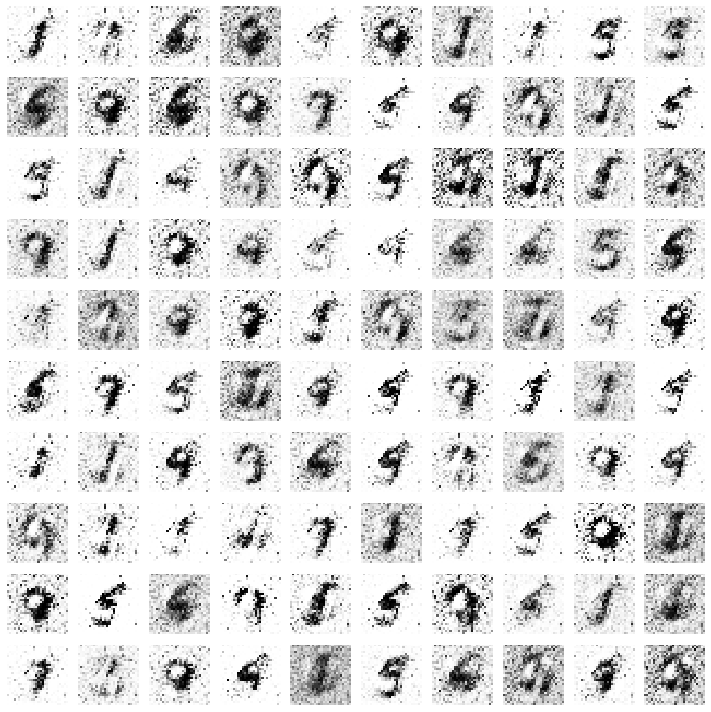

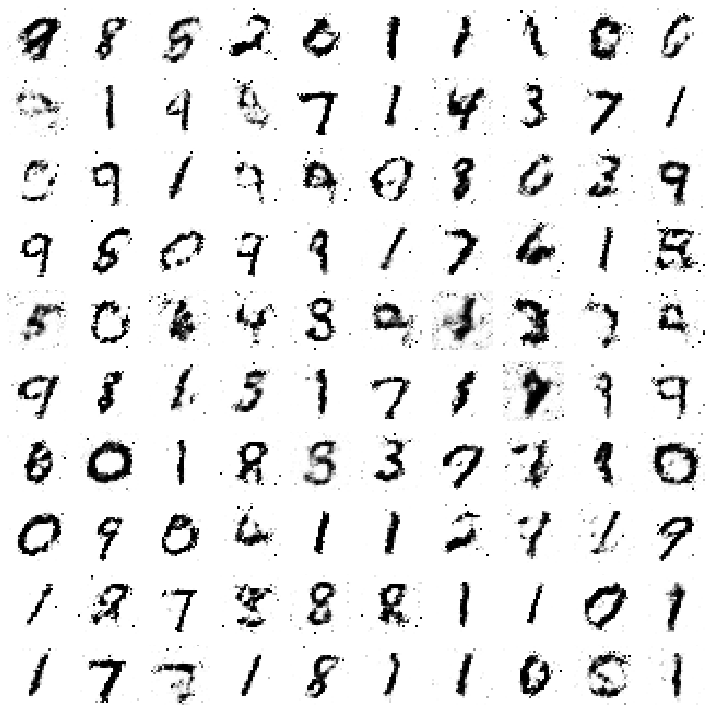

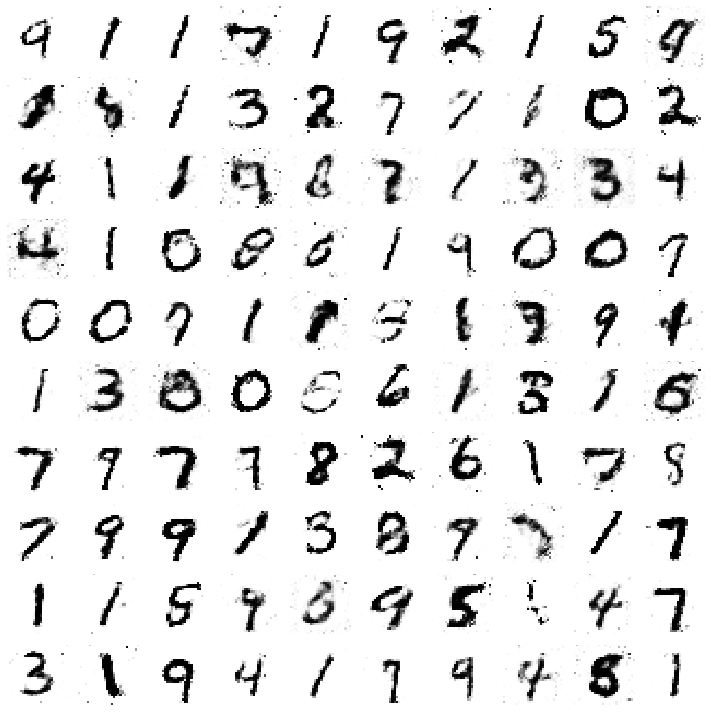

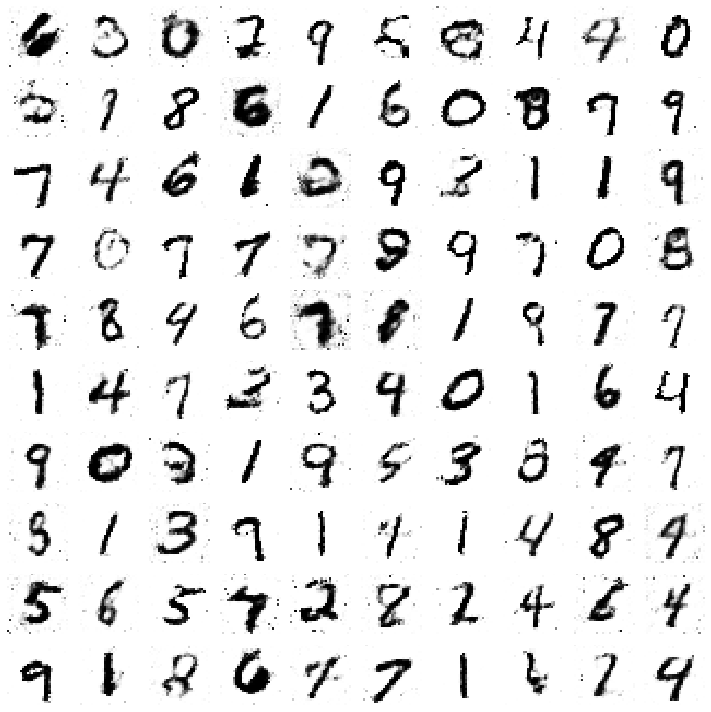

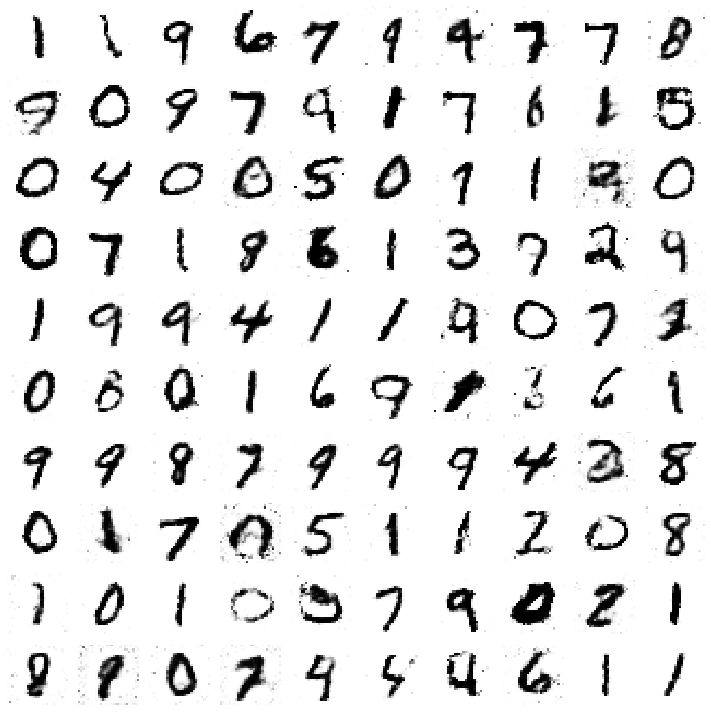

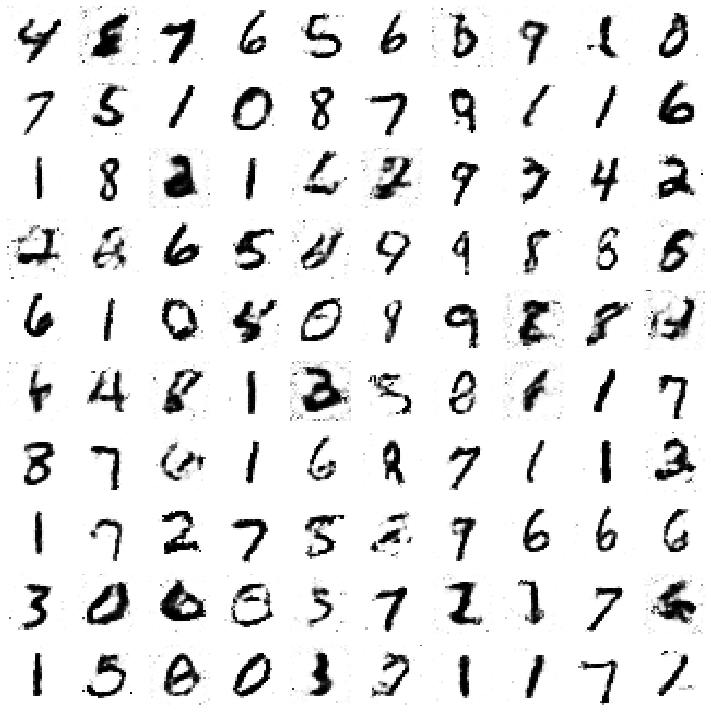

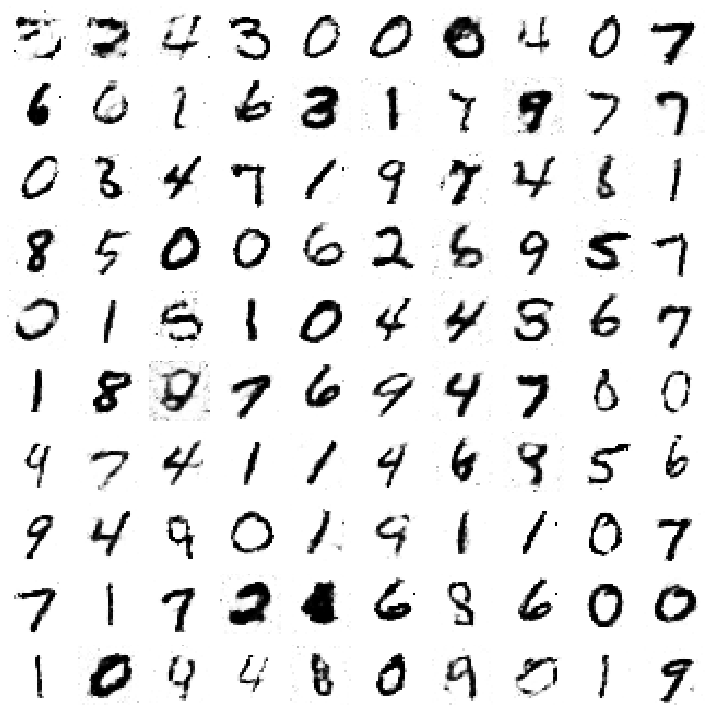

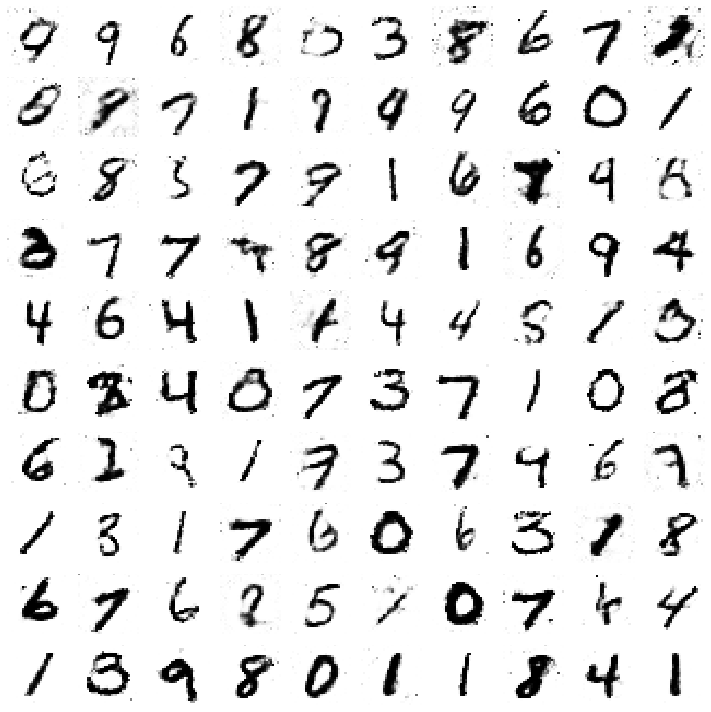

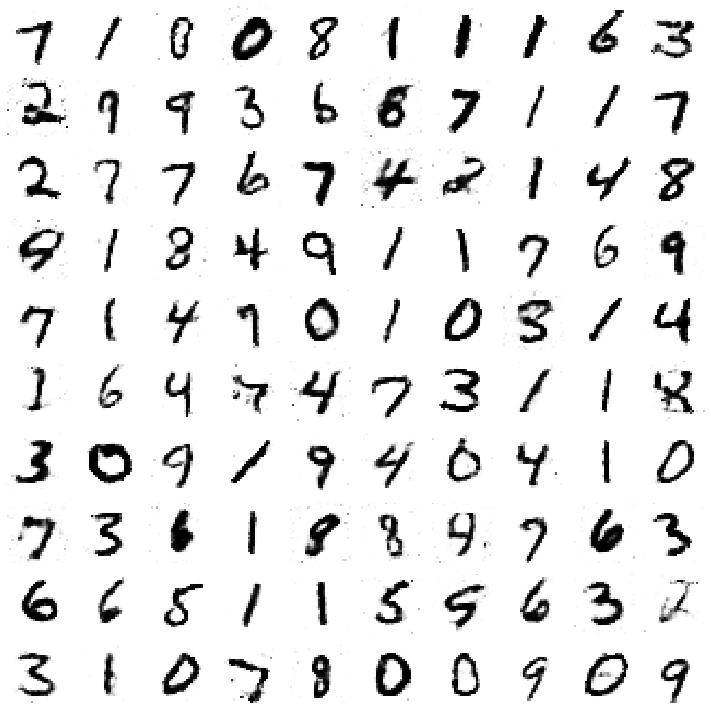

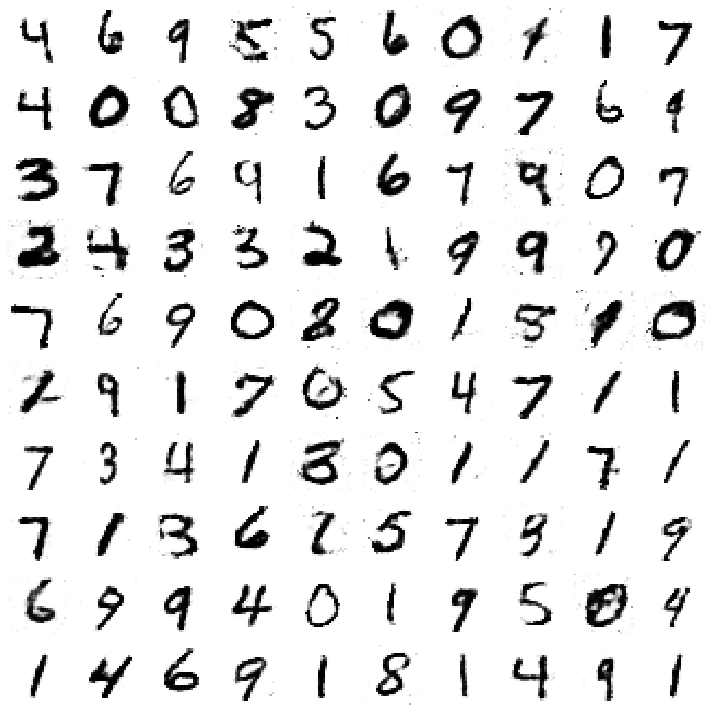

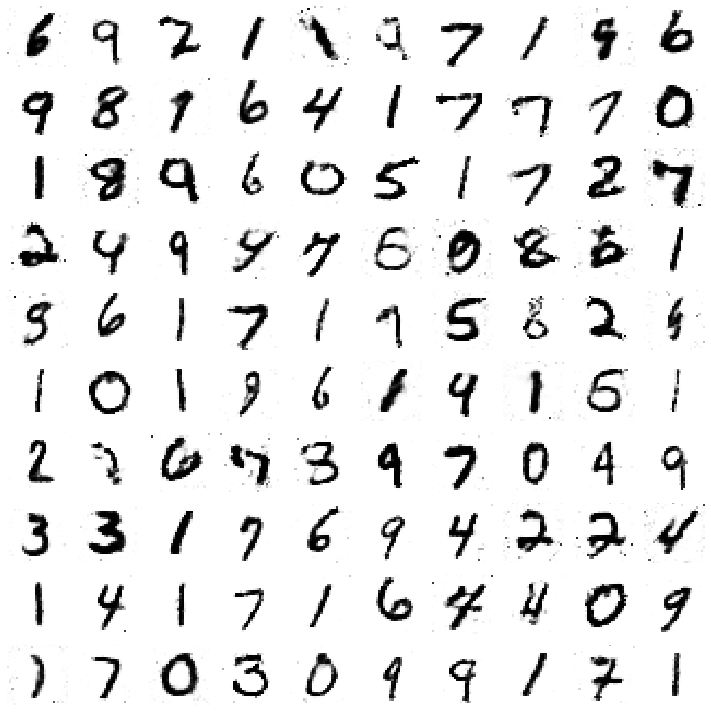

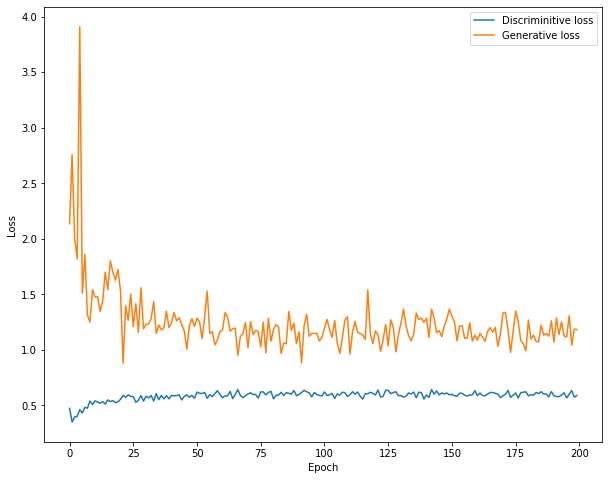

In [2]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from keras.layers import Input
from keras.models import Model, Sequential
from keras.layers.core import Reshape, Dense, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.datasets import mnist
from keras.optimizers import Adam
from keras import backend as K
from keras import initializers

#K.set_image_dim_ordering('th')

# 设置随机数种子, 使得我们看到同样数字的输出, 越来越清晰
np.random.seed(1000)

# 可以尝试不同的值, 10可能会更好
randomDim = 100

# 加载 MNIST 数据
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5)/127.5
X_train = X_train.reshape(60000, 784)

# Optimizer
adam = Adam(lr=0.0002, beta_1=0.5)

generator = Sequential()
generator.add(Dense(256, input_dim=randomDim, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784, activation='tanh'))
generator.compile(loss='binary_crossentropy', optimizer=adam)

discriminator = Sequential()
discriminator.add(Dense(1024, input_dim=784, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(512))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer=adam)

# 结合的网络结果, 注意 discriminator.trainable = False
discriminator.trainable = False
ganInput = Input(shape=(randomDim,))
x = generator(ganInput)
ganOutput = discriminator(x)
gan = Model(inputs=ganInput, outputs=ganOutput)
gan.compile(loss='binary_crossentropy', optimizer=adam)

dLosses = []
gLosses = []

# 使用曲线图显示每一个batch结束的loss
def plotLoss(epoch):
    plt.figure(figsize=(10, 8))
    plt.plot(dLosses, label='Discriminitive loss')
    plt.plot(gLosses, label='Generative loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig('gan_loss_epoch_%d.png' % epoch)

# 生成 100 张类似MNIST的图像
def plotGeneratedImages(epoch, examples=100, dim=(10, 10), figsize=(10, 10)):
    noise = np.random.normal(0, 1, size=[examples, randomDim])
    generatedImages = generator.predict(noise)
    generatedImages = generatedImages.reshape(examples, 28, 28)

    plt.figure(figsize=figsize)
    for i in range(generatedImages.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generatedImages[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('gan_generated_image_epoch_%d.png' % epoch)

# 保存 generator and discriminator 网络模型
def saveModels(epoch):
    generator.save('gan_generator_epoch_%d.h5' % epoch)
    discriminator.save('gan_discriminator_epoch_%d.h5' % epoch)

def train(epochs=1, batchSize=128):
    batchCount = X_train.shape[0] // batchSize
    print('Epochs:' + str(epochs))
    print('Batch size:' + str(batchSize))
    print('Batches per epoch:' + str(batchCount))

    for e in range(1, epochs+1):
        print( '-'*15 + 'Epoch %d' % e + '-'*15)
        for _ in tqdm(range(batchCount)):
            # 得到一组随机噪声, 和真实图像
            noise = np.random.normal(0, 1, size=[batchSize, randomDim])
            imageBatch = X_train[np.random.randint(0, X_train.shape[0], size=batchSize)]

            # 生成 fake MNIST 图像
            generatedImages = generator.predict(noise)
            
            X = np.concatenate([imageBatch, generatedImages])

            # 真实图像和生成图像的标签
            yDis = np.zeros(2*batchSize)
            # 设置真实图像的输出预期值为0.9
            yDis[:batchSize] = 0.9

            # 训练 discriminator
            discriminator.trainable = True
            dloss = discriminator.train_on_batch(X, yDis)

            # 训练 generator
            noise = np.random.normal(0, 1, size=[batchSize, randomDim])
            yGen = np.ones(batchSize)
            discriminator.trainable = False
            gloss = gan.train_on_batch(noise, yGen)

        # 保存 loss 
        dLosses.append(dloss)
        gLosses.append(gloss)

        if e == 1 or e % 20 == 0:
            plotGeneratedImages(e)
            saveModels(e)

    # Plot losses 
    plotLoss(e)

if __name__ == '__main__':
    train(200, 128)


# 风格转换

In [5]:
'''Neural style transfer with Keras.

Run the script with:
```
python neural_style_transfer.py path_to_your_base_image.jpg \
    path_to_your_reference.jpg prefix_for_results
```
e.g.:
```
python neural_style_transfer.py img/tuebingen.jpg \
    img/starry_night.jpg results/my_result
```
Optional parameters:
```
--iter, To specify the number of iterations \
    the style transfer takes place (Default is 10)
--content_weight, The weight given to the content loss (Default is 0.025)
--style_weight, The weight given to the style loss (Default is 1.0)
--tv_weight, The weight given to the total variation loss (Default is 1.0)
```

It is preferable to run this script on GPU, for speed.

Example result: https://twitter.com/fchollet/status/686631033085677568

# Details

Style transfer consists in generating an image
with the same "content" as a base image, but with the
"style" of a different picture (typically artistic).

This is achieved through the optimization of a loss function
that has 3 components: "style loss", "content loss",
and "total variation loss":

- The total variation loss imposes local spatial continuity between
the pixels of the combination image, giving it visual coherence.

- The style loss is where the deep learning keeps in --that one is defined
using a deep convolutional neural network. Precisely, it consists in a sum of
L2 distances between the Gram matrices of the representations of
the base image and the style reference image, extracted from
different layers of a convnet (trained on ImageNet). The general idea
is to capture color/texture information at different spatial
scales (fairly large scales --defined by the depth of the layer considered).

 - The content loss is a L2 distance between the features of the base
image (extracted from a deep layer) and the features of the combination image,
keeping the generated image close enough to the original one.

# References
    - [A Neural Algorithm of Artistic Style](http://arxiv.org/abs/1508.06576)
'''

from __future__ import print_function
from keras.preprocessing.image import load_img, save_img, img_to_array
import numpy as np
from scipy.optimize import fmin_l_bfgs_b
import time
import argparse

from keras.applications import vgg16
from keras import backend as K
'''
parser = argparse.ArgumentParser(description='Neural style transfer with Keras.')
parser.add_argument('base_image_path', metavar='base', type=str,
                    help='Path to the image to transform.')
parser.add_argument('style_reference_image_path', metavar='ref', type=str,
                    help='Path to the style reference image.')
parser.add_argument('result_prefix', metavar='res_prefix', type=str,
                    help='Prefix for the saved results.')
parser.add_argument('--iter', type=int, default=10, required=False,
                    help='Number of iterations to run.')
parser.add_argument('--content_weight', type=float, default=0.025, required=False,
                    help='Content weight.')
parser.add_argument('--style_weight', type=float, default=1.0, required=False,
                    help='Style weight.')
parser.add_argument('--tv_weight', type=float, default=1.0, required=False,
                    help='Total Variation weight.')

args = parser.parse_args()
base_image_path = args.base_image_path
style_reference_image_path = args.style_reference_image_path
result_prefix = args.result_prefix
iterations = args.iter
# these are the weights of the different loss components
total_variation_weight = args.tv_weight
style_weight = args.style_weight
content_weight = args.content_weight

args = parser.parse_args()
'''
base_image_path = '01.JPG'
style_reference_image_path = '02.png'
result_prefix = '03.jpg'
iterations = 10
# these are the weights of the different loss components
total_variation_weight = 1.0
style_weight = 1.0
content_weight = 0.025

# dimensions of the generated picture.
width, height = load_img(base_image_path).size
img_nrows = 400
img_ncols = int(width * img_nrows / height)

# util function to open, resize and format pictures into appropriate tensors


def preprocess_image(image_path):
    img = load_img(image_path, target_size=(img_nrows, img_ncols))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = vgg19.preprocess_input(img)
    return img

# util function to convert a tensor into a valid image


def deprocess_image(x):
    if K.image_data_format() == 'channels_first':
        x = x.reshape((3, img_nrows, img_ncols))
        x = x.transpose((1, 2, 0))
    else:
        x = x.reshape((img_nrows, img_ncols, 3))
    # Remove zero-center by mean pixel
    x[:, :, 0] += 103.939
    x[:, :, 1] += 116.779
    x[:, :, 2] += 123.68
    # 'BGR'->'RGB'
    x = x[:, :, ::-1]
    x = np.clip(x, 0, 255).astype('uint8')
    return x

# get tensor representations of our images
base_image = K.variable(preprocess_image(base_image_path))
style_reference_image = K.variable(preprocess_image(style_reference_image_path))

# this will contain our generated image
if K.image_data_format() == 'channels_first':
    combination_image = K.placeholder((1, 3, img_nrows, img_ncols))
else:
    combination_image = K.placeholder((1, img_nrows, img_ncols, 3))

# combine the 3 images into a single Keras tensor
input_tensor = K.concatenate([base_image,
                              style_reference_image,
                              combination_image], axis=0)

# build the VGG19 network with our 3 images as input
# the model will be loaded with pre-trained ImageNet weights
model = vgg16.VGG16(input_tensor=input_tensor,
                    weights='imagenet', include_top=False)
print('Model loaded.')

# get the symbolic outputs of each "key" layer (we gave them unique names).
outputs_dict = dict([(layer.name, layer.output) for layer in model.layers])

# compute the neural style loss
# first we need to define 4 util functions

# the gram matrix of an image tensor (feature-wise outer product)


def gram_matrix(x):
    assert K.ndim(x) == 3
    if K.image_data_format() == 'channels_first':
        features = K.batch_flatten(x)
    else:
        features = K.batch_flatten(K.permute_dimensions(x, (2, 0, 1)))
    gram = K.dot(features, K.transpose(features))
    return gram

# the "style loss" is designed to maintain
# the style of the reference image in the generated image.
# It is based on the gram matrices (which capture style) of
# feature maps from the style reference image
# and from the generated image


def style_loss(style, combination):
    assert K.ndim(style) == 3
    assert K.ndim(combination) == 3
    S = gram_matrix(style)
    C = gram_matrix(combination)
    channels = 3
    size = img_nrows * img_ncols
    return K.sum(K.square(S - C)) / (4.0 * (channels ** 2) * (size ** 2))

# an auxiliary loss function
# designed to maintain the "content" of the
# base image in the generated image


def content_loss(base, combination):
    return K.sum(K.square(combination - base))

# the 3rd loss function, total variation loss,
# designed to keep the generated image locally coherent


def total_variation_loss(x):
    assert K.ndim(x) == 4
    if K.image_data_format() == 'channels_first':
        a = K.square(
            x[:, :, :img_nrows - 1, :img_ncols - 1] - x[:, :, 1:, :img_ncols - 1])
        b = K.square(
            x[:, :, :img_nrows - 1, :img_ncols - 1] - x[:, :, :img_nrows - 1, 1:])
    else:
        a = K.square(
            x[:, :img_nrows - 1, :img_ncols - 1, :] - x[:, 1:, :img_ncols - 1, :])
        b = K.square(
            x[:, :img_nrows - 1, :img_ncols - 1, :] - x[:, :img_nrows - 1, 1:, :])
    return K.sum(K.pow(a + b, 1.25))

# combine these loss functions into a single scalar
loss = K.variable(0.0)
layer_features = outputs_dict['block5_conv2']
base_image_features = layer_features[0, :, :, :]
combination_features = layer_features[2, :, :, :]
loss += content_weight * content_loss(base_image_features,
                                      combination_features)

feature_layers = ['block1_conv1', 'block2_conv1',
                  'block3_conv1', 'block4_conv1',
                  'block5_conv1']
for layer_name in feature_layers:
    layer_features = outputs_dict[layer_name]
    style_reference_features = layer_features[1, :, :, :]
    combination_features = layer_features[2, :, :, :]
    sl = style_loss(style_reference_features, combination_features)
    loss += (style_weight / len(feature_layers)) * sl
loss += total_variation_weight * total_variation_loss(combination_image)

# get the gradients of the generated image wrt the loss
grads = K.gradients(loss, combination_image)

outputs = [loss]
if isinstance(grads, (list, tuple)):
    outputs += grads
else:
    outputs.append(grads)

f_outputs = K.function([combination_image], outputs)


def eval_loss_and_grads(x):
    if K.image_data_format() == 'channels_first':
        x = x.reshape((1, 3, img_nrows, img_ncols))
    else:
        x = x.reshape((1, img_nrows, img_ncols, 3))
    outs = f_outputs([x])
    loss_value = outs[0]
    if len(outs[1:]) == 1:
        grad_values = outs[1].flatten().astype('float64')
    else:
        grad_values = np.array(outs[1:]).flatten().astype('float64')
    return loss_value, grad_values

# this Evaluator class makes it possible
# to compute loss and gradients in one pass
# while retrieving them via two separate functions,
# "loss" and "grads". This is done because scipy.optimize
# requires separate functions for loss and gradients,
# but computing them separately would be inefficient.


class Evaluator(object):

    def __init__(self):
        self.loss_value = None
        self.grads_values = None

    def loss(self, x):
        assert self.loss_value is None
        loss_value, grad_values = eval_loss_and_grads(x)
        self.loss_value = loss_value
        self.grad_values = grad_values
        return self.loss_value

    def grads(self, x):
        assert self.loss_value is not None
        grad_values = np.copy(self.grad_values)
        self.loss_value = None
        self.grad_values = None
        return grad_values

evaluator = Evaluator()

# run scipy-based optimization (L-BFGS) over the pixels of the generated image
# so as to minimize the neural style loss
x = preprocess_image(base_image_path)

for i in range(iterations):
    print('Start of iteration', i)
    start_time = time.time()
    x, min_val, info = fmin_l_bfgs_b(evaluator.loss, x.flatten(),
                                     fprime=evaluator.grads, maxfun=20)
    print('Current loss value:', min_val)
    # save current generated image
    img = deprocess_image(x.copy())
    fname = result_prefix + '_at_iteration_%d.png' % i
    save_img(fname, img)
    end_time = time.time()
    print('Image saved as', fname)
    print('Iteration %d completed in %ds' % (i, end_time - start_time))


Model loaded.
Start of iteration 0
Current loss value: 1682574800.0
Image saved as 03.jpg_at_iteration_0.png
Iteration 0 completed in 6s
Start of iteration 1
Current loss value: 1103883300.0
Image saved as 03.jpg_at_iteration_1.png
Iteration 1 completed in 3s
Start of iteration 2
Current loss value: 1005035000.0
Image saved as 03.jpg_at_iteration_2.png
Iteration 2 completed in 3s
Start of iteration 3
Current loss value: 961053500.0
Image saved as 03.jpg_at_iteration_3.png
Iteration 3 completed in 3s
Start of iteration 4
Current loss value: 941844000.0
Image saved as 03.jpg_at_iteration_4.png
Iteration 4 completed in 3s
Start of iteration 5
Current loss value: 928157760.0
Image saved as 03.jpg_at_iteration_5.png
Iteration 5 completed in 3s
Start of iteration 6
Current loss value: 919698200.0
Image saved as 03.jpg_at_iteration_6.png
Iteration 6 completed in 3s
Start of iteration 7
Current loss value: 912543100.0
Image saved as 03.jpg_at_iteration_7.png
Iteration 7 completed in 3s
Start o

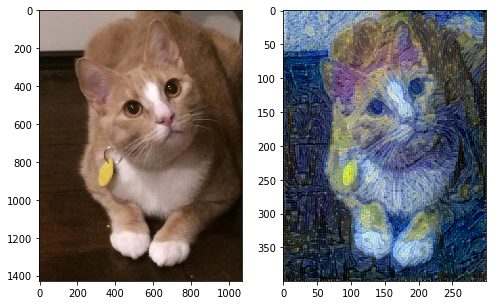

In [10]:
import matplotlib.pyplot as plt
img1 = load_img('01.JPG')
img2 = load_img('03.jpg_at_iteration_9.png')
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(img1)
plt.subplot(1,2,2)
plt.imshow(img2)